# Gradient method for unconstrained optimization

The goal of this lab is to get a feel for gradient-based optimisation methods. Throughout the lab we will be working with the [Rosenbrock function](https://www.wikiwand.com/en/Rosenbrock_function) which is defined as:

$$f(x,y)=(x_0 - a)^{2}+b(x_0^2 - x_1)^{2}$$

We will be setting the parameters such that $a=1$ and $b=10$, which is:

$$f(x,y)=(x_0 - 1)^{2}+10(x_0^2 - x_1)^{2}$$

The goal is thus to find a pair of values $(x_0, x_1)$ such that $f(x_0, x_1)$ is minimal. The Rosenbrock function is two-dimensional so for each method we should be able to plot the progress of each method, along with [contour lines](https://www.wikiwand.com/en/Contour_line).

Let's start by writing down the Rosenbrock function.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as la
import math

In [3]:
def Rosenbrock(X):
  return ((X[0] - 1)**2) + 10*(X[0]**2 - X[1])**2

Let's now write down the gradient of the Rosenbrock function.

$$\begin{cases}
\frac{\partial f}{\partial x_0} = 2 (x_0 - a) + 4bx_0 (x_0^2 - x_1) \\
\frac{\partial f}{\partial x_1} = -2b (x_0^2 - x_1)
\end{cases}$$


In [4]:
def GradRosenbrock(X):
  return np.asarray([2*(X[0] - 1)+4*10*X[0]*(X[0]**2 - X[1]),-2*10*(X[0]**2 - X[1])])

We can draw a contour plot of the function.

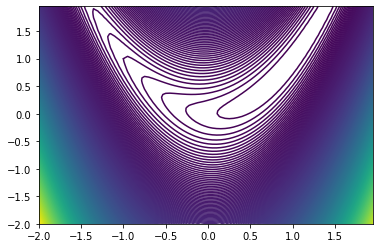

In [5]:
import matplotlib.pyplot as plt
def plot_contour(a, b, c, d, f, ax):
    delta = 0.05
    x0, x1 = np.meshgrid(np.arange(a, b, delta), np.arange(c, d, delta)) 
    ax.contour(x0, x1, f((x0,x1)), 500)
    plt.show()

# This doesn't work with Jupyter Lab (as of October 2018), please use Jupyter Notebook
#%matplotlib notebook  

fig, ax = plt.subplots()

plot_contour(-2, 2, -2, 2, Rosenbrock, ax)

## Vanilla gradient descent (fixed step size)

Let's get down to business.

In [6]:
def GPF(gradf,X0,rho,eps,max_iter):
    X = X0
    Y = [X,]
    i = 0
    while la.norm(gradf(X)) > eps and i <= max_iter:
        d = -gradf(X)
        X = X + rho*d
        Y.append(X)
        i+=1
    return Y

[[-1.          1.        ]
 [-0.96        1.        ]
 [-0.9509056   0.98432   ]
 [-0.94235395  0.96830029]
 [-0.93376372  0.95224643]
 [-0.92509279  0.93618008]
 [-0.91633578  0.9201034 ]
 [-0.9074902   0.90401697]
 [-0.89855378  0.88792127]
 [-0.88952418  0.87181679]
 [-0.88039898  0.85570409]
 [-0.87117567  0.83958374]
 [-0.86185165  0.8234564 ]
 [-0.8524242   0.80732277]
 [-0.84289052  0.79118362]
 [-0.83324769  0.77503978]
 [-0.82349266  0.75889217]
 [-0.81362228  0.74274177]
 [-0.80363327  0.72658966]
 [-0.79352221  0.71043701]
 [-0.78328555  0.69428511]
 [-0.77291961  0.67813534]
 [-0.76242053  0.66198921]
 [-0.75178432  0.64584838]
 [-0.74100682  0.62971464]
 [-0.73008372  0.61358993]
 [-0.71901051  0.59747639]
 [-0.70778252  0.58137634]
 [-0.69639489  0.56529229]
 [-0.68484256  0.549227  ]
 [-0.6731203   0.53318347]
 [-0.66122266  0.51716496]
 [-0.64914399  0.50117505]
 [-0.63687844  0.48521762]
 [-0.62441997  0.46929693]
 [-0.6117623   0.4534176 ]
 [-0.598899    0.4375847 ]
 

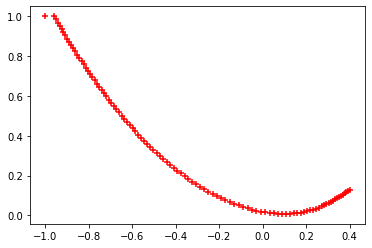

In [7]:
#x0,x1 = np.arange(-2,2,.1), np.arange(-2,2,.1)
#[X0,X1] = np.meshgrid(x0,x1)
#X = np.array([X0, X1])
#d = -GradRosenbrook(X)
maxiter = 100
rho = .01
# x0,x1 = np.linspace(-1,1,maxiter), np.linspace(-1,1,maxiter)
eps = 10e-5
XX = [-1,1]
#GradRosenbrook((x0,x1))
y = np.array(GPF(GradRosenbrock,XX,rho,eps,maxiter))
print(y)
for i in range(y.shape[0]):
    plt.scatter(y[i,0],y[i,1], color = "red", marker = '+')



We can plot the progress of the gradient descent.

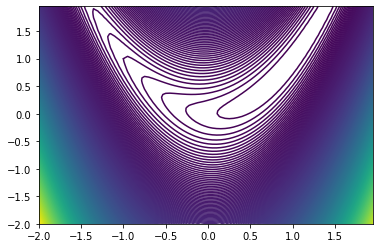

In [8]:
import time


def plot_trace(trace, steps, f, ax):
    for i, (x0, x1) in enumerate((trace)):
        ax.scatter(x0, x1, color='red', marker='+')
        ax.set_title('Iteration {}; step = {:.5f}; y = {:.5f}'.format(i+1, steps[i], f((x0, x1))))
        fig.canvas.draw()

fig, ax = plt.subplots()
plt.ion()


rho = .01
Max_iter = 100
#x0,x1 = np.linspace(-1,1,Max_iter), np.linspace(-1,1,Max_iter)
# X = (x0,x1)
XX = [-1,1]
eps = 10e-5
trace = GPF(GradRosenbrock, XX, rho,eps,Max_iter)
#print(trace)

plot_contour(-2, 2, -2, 2, Rosenbrock, ax)
plot_trace(trace, [0.01] * len(trace), Rosenbrock, ax)

## The Armijo-Goldstein rule

The algorithm is described [here](https://www.wikiwand.com/en/Backtracking_line_search).

The condition we have to satisfy is:

$$f(x + \rho d) \leq f(x) + c \rho \times d^T \nabla f(x)$$

In [9]:
def RLA(f, gradf,X0,d,rho_0, c):
    rho  =rho_0
    X = np.asarray(X0)
    while   (f(X) - f(X +rho*d) + c[0]*rho*np.vdot(gradf(X),d) < 0):
        rho= rho/2
    return rho

In [10]:

c = [0.5, 0.05]
max_iter = 100
rho_0 = .1
#x0,x1 = np.linspace(-1,1,max_iter), np.linspace(-1,1,max_iter)
#X0 = (x0,x1)
X0 = [-1,1]
d = np.array([GradRosenbrock(X0)[0],GradRosenbrock(X0)[1]])
print(RLA(Rosenbrock, GradRosenbrock, X0, d, rho_0, c))

4.4408920985006264e-17


In [11]:
def GRL(f, gradf,X0,search_name, rho_0,c,eps,max_iter ):
    rho_list = [rho_0,]
    X = X0
    Y = [X, ]
    i = 0
    while la.norm(gradf(X)) > eps  and i < max_iter:
        d = GradRosenbrock(X) 
        rho = search_name(f,gradf, X, d, rho_list[i],c)
        X = X - rho_list[i]*d
        Y.append(X)
        rho_list.append(rho)
        i+=1
    return Y, rho_list

In [12]:
c = [.5, .05]
max_iter = 100
rho_0 = .1
eps = 10e-5
# x0,x1 = np.linspace(-1,1,max_iter), np.linspace(-1,1,max_iter)
# X0 = (x0,x1)
XX =[-1,1]
#GRL AVEC RLA
Y,RHO = GRL(Rosenbrock, GradRosenbrock, XX,RLA,rho_0, c,eps, max_iter)
print(Y)
print(RHO)

[[-1, 1], array([-0.6,  1. ]), array([-0.6,  1. ]), array([-0.6,  1. ]), array([-0.6,  1. ]), array([-0.6,  1. ]), array([-0.6,  1. ]), array([-0.6,  1. ]), array([-0.6,  1. ]), array([-0.6,  1. ]), array([-0.6,  1. ]), array([-0.6,  1. ]), array([-0.6,  1. ]), array([-0.6,  1. ]), array([-0.6,  1. ]), array([-0.6,  1. ]), array([-0.6,  1. ]), array([-0.6,  1. ]), array([-0.6,  1. ]), array([-0.6,  1. ]), array([-0.6,  1. ]), array([-0.6,  1. ]), array([-0.6,  1. ]), array([-0.6,  1. ]), array([-0.6,  1. ]), array([-0.6,  1. ]), array([-0.6,  1. ]), array([-0.6,  1. ]), array([-0.6,  1. ]), array([-0.6,  1. ]), array([-0.6,  1. ]), array([-0.6,  1. ]), array([-0.6,  1. ]), array([-0.6,  1. ]), array([-0.6,  1. ]), array([-0.6,  1. ]), array([-0.6,  1. ]), array([-0.6,  1. ]), array([-0.6,  1. ]), array([-0.6,  1. ]), array([-0.6,  1. ]), array([-0.6,  1. ]), array([-0.6,  1. ]), array([-0.6,  1. ]), array([-0.6,  1. ]), array([-0.6,  1. ]), array([-0.6,  1. ]), array([-0.6,  1. ]), arr

## The Wolfe conditions

The two conditions are:

1. $f(x + \rho d) \leq f(x) + c_1 \rho \times d^T \nabla f(x)$
2. $-d^T \nabla f(x + \rho d) \leq -c_2 d^T \nabla f(x) $ 

The first condition is the Armijo-Goldstein rule while the second condition is known as the **curvature condition**.

In [13]:
def RLW(f, gradf,X0,d,rho_0, c):
    """ Recherche lineaire Wolfe : condition d'Armijo + conditio de la courbure """
    X = np.asarray(X0)
    k = 0
    rho = rho_0
    rho_moin = 0
    rho_plus = 10
    while ( (f(X) - f(X +rho*d) + c[0]*rho*np.vdot(gradf(X),d) < 0).any() or ( -np.vdot(gradf(X + rho*d), d) + c[1]*rho*np.vdot(gradf(X),d) > 0 ).any()) :
        # Tant que les deux conditions de wolfes ne sont pas verifies
        if (f(X) - f(X +rho*d) + c[0]*rho*np.vdot(gradf(X),d) < 0).any(): 
        # si rho ne verifie pas la condition d'armijo
            rho_plus = rho
            rho = (rho_plus + rho_moin)/2

        if ( np.vdot(gradf(X + rho*d), d) -  c[1]*rho*np.vdot(gradf(X),d) < 0 ).any(): 
            # si rho ne verifie pas la condition de la courbure
            rho_moin = rho
            rho = (rho_plus + rho_moin)/2 
    return rho

In [14]:
c = [0.5, 0.6]
max_iter = 100
rho_0 = .1
eps = 10e-5
# x0,x1 = np.linspace(-1,1,max_iter), np.linspace(-1,1,max_iter)
# X0 = (x0,x1)
XX = [-1,1]
#GRL + RLW
Y,RHO = GRL(Rosenbrock, GradRosenbrock, XX,RLW,rho_0, c,eps, max_iter)
print(Y)
print(RHO)

[[-1, 1], array([-0.6,  1. ]), array([-0.6,  1. ]), array([-0.6,  1. ]), array([-0.6,  1. ]), array([-0.6,  1. ]), array([-0.6,  1. ]), array([-0.6,  1. ]), array([-0.6,  1. ]), array([-0.6,  1. ]), array([-0.6,  1. ]), array([-0.6,  1. ]), array([-0.6,  1. ]), array([-0.6,  1. ]), array([-0.6,  1. ]), array([-0.6,  1. ]), array([-0.6,  1. ]), array([-0.6,  1. ]), array([-0.6,  1. ]), array([-0.6,  1. ]), array([-0.6,  1. ]), array([-0.6,  1. ]), array([-0.6,  1. ]), array([-0.6,  1. ]), array([-0.6,  1. ]), array([-0.6,  1. ]), array([-0.6,  1. ]), array([-0.6,  1. ]), array([-0.6,  1. ]), array([-0.6,  1. ]), array([-0.6,  1. ]), array([-0.6,  1. ]), array([-0.6,  1. ]), array([-0.6,  1. ]), array([-0.6,  1. ]), array([-0.6,  1. ]), array([-0.6,  1. ]), array([-0.6,  1. ]), array([-0.6,  1. ]), array([-0.6,  1. ]), array([-0.6,  1. ]), array([-0.6,  1. ]), array([-0.6,  1. ]), array([-0.6,  1. ]), array([-0.6,  1. ]), array([-0.6,  1. ]), array([-0.6,  1. ]), array([-0.6,  1. ]), arr

In [15]:
# ls = WolfeLineSearch(c1=0.0001, c2=0.7, min_step=0, max_step=10)
# opt = LineSearchGD(X0=[-1.0, 1.0], ls=ls, n_iterations=100)
# trace, steps = opt.optimize(f=f, g=g)

# fig, ax = plt.subplots()
# plt.ion()

# plot_contour(-2, 2, -2, 2, f, ax)
# plot_trace(trace, steps, f, ax)

## Computing the optimal step size

In [16]:
def optimal_step_size(X,gradf):
    x0 = 1 #a = 1
    x1 = 10 #b = 10
    
    y0,y1 = gradf(X)

    polynome=np.array([4*x1*y0**4,
                      6*x1*(y0**2)*(y1-2*y0*X[0]),
                      2*(y0**2)+2*x1*(2*(y0**2)*(X[0]**2-X[1])+(y1-2*y0*X[0])**2),
                      2*x1*(y1-2*y0*X[0])*(X[0]**2-X[1])-2*y0*(X[0]-x0)])
    
    roots = []
    for r in np.roots(polynome):
        if r.imag == 0.0 and r.real >= 0.0 :
            roots.append(r.real)
        

    return min(roots)

def GPE(gradf,X0,eps,max_iter):
    X = X0
    Y = [X0, ]
    i = 0
    while la.norm(gradf(X)) > eps and i < max_iter:
        d = -gradf(X)
        r = optimal_step_size(X,gradf)
        X = X + r*d
        Y.append(X)
        i+=1
    return Y

[[-1.          1.        ]
 [-0.9472136   1.        ]
 [-0.9472136   0.8972136 ]
 [-0.88937876  0.8972136 ]
 [-0.88937876  0.79099458]
 [-0.82484998  0.79099458]
 [-0.82484998  0.68037749]
 [-0.75085748  0.68037749]
 [-0.75085748  0.68037749]
 [-0.75085748  0.68037749]
 [-0.75085748  0.68037749]
 [-0.75085748  0.68037749]
 [-0.75085748  0.68037749]
 [-0.75085748  0.68037749]
 [-0.75085748  0.68037749]
 [-0.75085748  0.68037749]
 [-0.75085748  0.68037749]
 [-0.75085748  0.68037749]
 [-0.75085748  0.68037749]
 [-0.75085748  0.68037749]
 [-0.75085748  0.68037749]
 [-0.75085748  0.68037749]
 [-0.75085748  0.68037749]
 [-0.75085748  0.68037749]
 [-0.75085748  0.68037749]
 [-0.75085748  0.68037749]
 [-0.75085748  0.68037749]
 [-0.75085748  0.68037749]
 [-0.75085748  0.68037749]
 [-0.75085748  0.68037749]
 [-0.75085748  0.68037749]
 [-0.75085748  0.68037749]
 [-0.75085748  0.68037749]
 [-0.75085748  0.68037749]
 [-0.75085748  0.68037749]
 [-0.75085748  0.68037749]
 [-0.75085748  0.68037749]
 

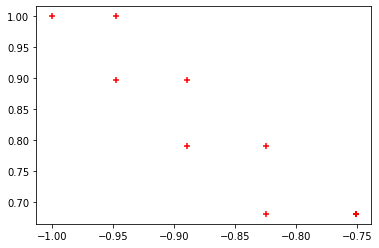

In [17]:
X0=[-1,1]
Max_iter=100
eps = 10e-5
Y=np.asarray(GPE(GradRosenbrock, X0,eps,Max_iter))
print(Y)
for i in range(Y.shape[0]):
    plt.scatter(Y[i,0], Y[i,1], color = "red", marker = "+")
# fig, ax = plt.subplots()
# plt.ion()

# plot_contour(-2, 2, -2, 2, Rosenbrock, ax)
# trace=X
# plot_trace(trace, [0.01] * len(trace), Rosenbrock, ax)

## Global comparison